## Import Libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Upload Dataset

In [99]:
book_df = pd.read_csv('book/Books.csv')
rating_df = pd.read_csv('book/Ratings.csv')

## Book Data Preprocessing

In [100]:
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [101]:
book_df.shape

(271360, 8)

In [102]:
book_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [103]:
book_df.dropna(inplace=True)

In [104]:
book_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

## Rating Data Preprocessing

In [105]:
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [106]:
rating_df.shape

(1149780, 3)

In [107]:
rating_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

## Exploratory Data Analysis

In [108]:
user_rating = rating_df['User-ID'].value_counts()

In [109]:
user_rating

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

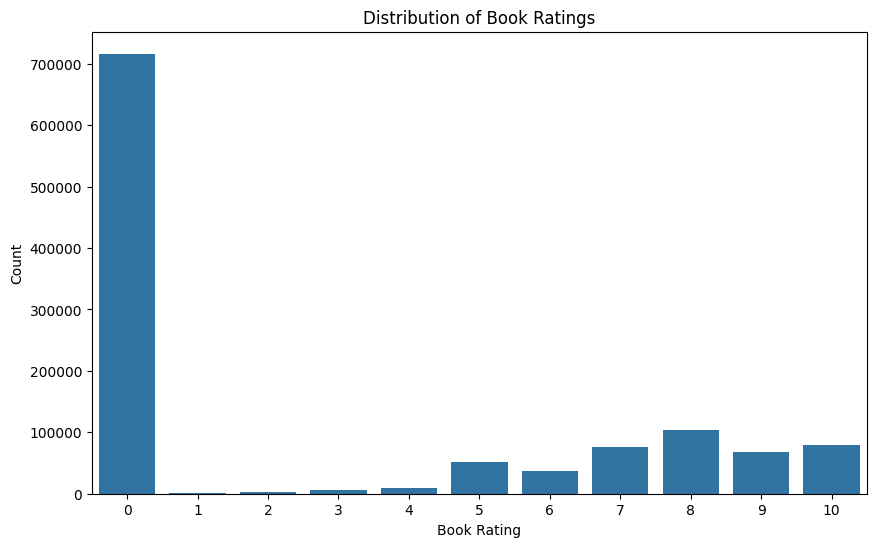

In [110]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Book-Rating', data=rating_df)
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

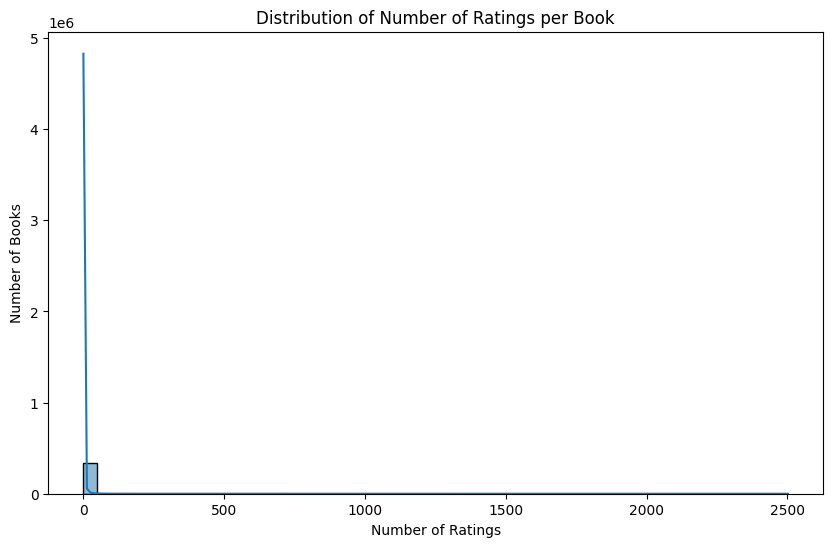

In [111]:
num_ratings_per_book = rating_df['ISBN'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(num_ratings_per_book, bins=50, kde=True)
plt.title('Distribution of Number of Ratings per Book')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Books')
plt.show()

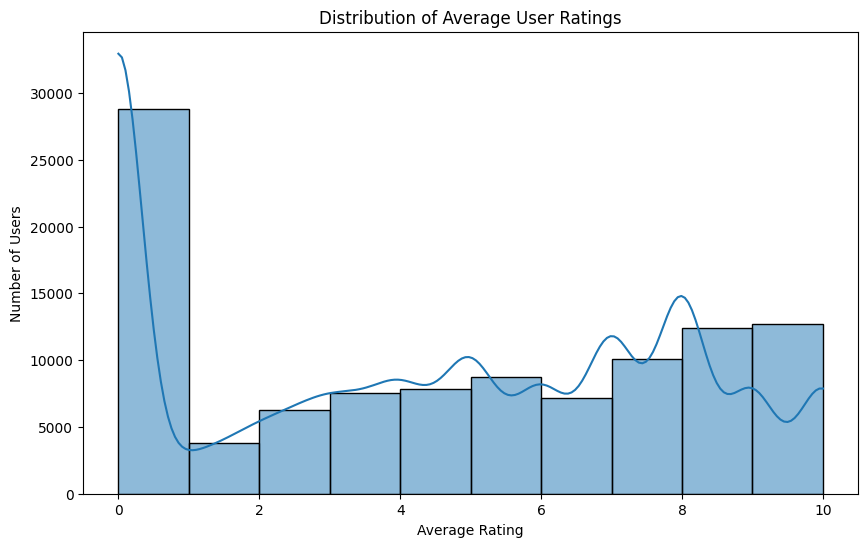

In [112]:
user_ratings_dist = rating_df.groupby('User-ID')['Book-Rating'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(user_ratings_dist, bins=10, kde=True)
plt.title('Distribution of Average User Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.show()

In [113]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [114]:
rating_df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


## Preprocess for Machine Learning

In [115]:
book_df = book_df.drop(['Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)

In [116]:
book_df

,ISBN,Book-Title,Book-Author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber
...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger
271356,0525447644,From One to One Hundred,Teri Sloat
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker
271358,0192126040,Republic (World's Classics),Plato


In [117]:
ratings = rating_df['User-ID'].value_counts()

In [118]:
ratings.sort_values(ascending=False).head()

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
Name: count, dtype: int64

### Filter users with less than 200 ratings

In [119]:
len(ratings[ratings < 200])

104378

In [120]:
rating_df['User-ID'].isin(ratings[ratings < 200].index).sum()

622224

In [121]:
filtered_users = ratings[ratings < 200].index

df_ratings_rm = rating_df[~rating_df['User-ID'].isin(filtered_users)]

df_ratings_rm.shape

(527556, 3)

### Filter books with less than 100 ratings

In [122]:
ratings = rating_df['ISBN'].value_counts() 
ratings.sort_values(ascending=False).head()

ISBN
0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
Name: count, dtype: int64

In [123]:
len(ratings[ratings < 100])

339825

In [124]:
book_df['ISBN'].isin(ratings[ratings < 100].index).sum()

269417

In [125]:
filtered_isbns = ratings[ratings < 100].index

df_ratings_rm = df_ratings_rm[~df_ratings_rm['ISBN'].isin(filtered_isbns)]

df_ratings_rm.shape

(49781, 3)

In [126]:
df_ratings_rm.head()

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1469,277427,0060930535,0
1471,277427,0060934417,0
1474,277427,0061009059,9
1484,277427,0140067477,0


In [127]:
book_df.head()

,ISBN,Book-Title,Book-Author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [128]:
df = df_ratings_rm.pivot_table(index=['User-ID'],columns=['ISBN'],values='Book-Rating').fillna(0).T
df.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
0060008032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
df.index = df.join(book_df.set_index('ISBN'))['Book-Title']

In [130]:
df = df.sort_index()
df.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
df.loc["I'll Be Seeing You"][:5]

User-ID
254     0.0
2276    0.0
2766    0.0
2977    0.0
3363    0.0
Name: I'll Be Seeing You, dtype: float64

In [132]:
df.to_csv('preprocessed_book_data.csv', index=True)

PermissionError: [Errno 13] Permission denied: 'preprocessed_book_data.csv'

### Create KNN Model

In [133]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [134]:
model = NearestNeighbors(metric='cosine')
model.fit(df.values)

NearestNeighbors(metric='cosine')

### Check Prediction

In [135]:
title = "I'll Be Seeing You"
df.loc[title].shape

(888,)

In [136]:
distance, indice = model.kneighbors([df.loc[title].values], n_neighbors=6)

print(distance)
print(indice)

[[2.22044605e-16 4.88018643e-01 5.29929847e-01 5.41625389e-01
  6.00052629e-01 6.19519836e-01]]
[[264 724 139 302  77 314]]


In [137]:
pd.DataFrame({
    'title'   : df.iloc[indice[0]].index.values,
    'distance': distance[0]
}) \
.sort_values(by='distance', ascending=False)

,title,distance
5,"Loves Music, Loves to Dance",6.195198e-01
4,Before I Say Good-Bye,6.000526e-01
3,Let Me Call You Sweetheart,5.416254e-01
2,Daddy's Little Girl,5.299298e-01
1,You Belong To Me,4.880186e-01
0,I'll Be Seeing You,2.220446e-16


In [138]:
def get_recommends(title=""):
    if title not in df.index:
        print(f"The book '{title}' does not exist in the dataset.")
        return []

    book_vector = df.loc[title].values.reshape(1, -1)

    distances, indices = model.kneighbors(book_vector, n_neighbors=6)

    recommended_books = pd.DataFrame({
        'title': df.index[indices.flatten()][1:],
        'distance': distances.flatten()[1:]  
    })

    recommended_books = recommended_books.sort_values(by='distance', ascending=True)

    return [title, recommended_books.values.tolist()]

In [139]:
books = get_recommends("I'll Be Seeing You")
print(books)

["I'll Be Seeing You", [['You Belong To Me', 0.48801864348760604], ["Daddy's Little Girl", 0.5299298469418234], ['Let Me Call You Sweetheart', 0.5416253889880817], ['Before I Say Good-Bye', 0.6000526286647707], ['Loves Music, Loves to Dance', 0.6195198363363135]]]


## Save Model

In [140]:
import joblib

joblib.dump(model, 'book_recommender_model.joblib')

['book_recommender_model.joblib']

In [141]:
loaded_model = joblib.load('book_recommender_model.joblib')

In [142]:
title = "I'll be Seeing You".strip().lower()

# Find the index of the matching title (if it exists)
matching_index = df.index.str.strip().str.lower().get_loc(title)

if not pd.isnull(matching_index):
    title = df.index[matching_index]
    book_vector = df.loc[title].values.reshape(1, -1)
    distances, indices = loaded_model.kneighbors(book_vector, n_neighbors=6)

    # Print the recommended books
    recommended_books = df.index[indices.flatten()][1:]  # Exclude the book itself
    print(f"Recommendations for '{title}':")
    for book, distance in zip(recommended_books, distances.flatten()[1:]):
        print(f"{book} (similarity score: {1 - distance:.2f})")
else:
    print(f"Book '{title}' not found in the dataset.")


Recommendations for 'I'll Be Seeing You':
You Belong To Me (similarity score: 0.51)
Daddy's Little Girl (similarity score: 0.47)
Let Me Call You Sweetheart (similarity score: 0.46)
Before I Say Good-Bye (similarity score: 0.40)
Loves Music, Loves to Dance (similarity score: 0.38)
